# Unsupervised Learning 

Until now, we have been working with supervised learning, where we have a dataset with input-output pairs and we train a model to predict the output given the input. In unsupervised learning, we don't have the output, and the goal is to find patterns in the data. Unsupervised learning learns from the data itself, without any labels to guide the process. It identifies commonalities in the data and reacts based on the presence or absence of such commonalities in each new piece of data. Common unsupervised learning tasks include clustering, dimensionality reduction, and anomaly detection. In this notebook, we will focus on clustering. The notebook was inspired by the [Kaggle Shop Clustering notebook](https://www.kaggle.com/code/utkarshsaxenadn/shop-customer-clustering/notebook).

We start by loading the dataset. The dataset contains shop customer data from a hypothetical shop that collects and analyses customer data through membership cards. To load the dataset, run the following code: 

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd

customers_df = pd.read_csv(os.path.join(data_directory, 'customers-dataset/Customers.csv'))
customers_df.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

We see that the dataset has 8 columns. The columns are as follows:

- **Customer ID**: A unique identifier assigned to each customer in the dataset. It is used to differentiate between individual customers and to keep track of their purchases and other behaviors.

- **Gender**: The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.

- **Age**: The age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

- **Annual Income**: The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

- **Spending Score**: A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.

- **Profession**: The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.

- **Work Experience**: The number of years of work experience of the customer. This feature can be used to segment customers based on their level of experience, which can help identify purchasing patterns and preferences among different experience levels.

- **Family Size**: The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns and preferences among different family sizes, such as families with children versus families without children.

## Data Exploration

Before we start clustering, let's explore the dataset to understand the distribution of the features and identify any patterns or trends in the data. Until now, you have been following the same procedure every time you dealt with a supervised dataset. While some of the steps are similar for unsupervised learning, there are also some differences. All label related steps are not required in unsupervised learning, and as we don't have labels, we can't calculate the performance metrics (like accuracy, F1, etc.) of the model. We do not need to split the data into training and testing sets, as we are not training a model to predict any output. Instead, we will use the entire dataset to identify patterns and clusters in the data.

### Missing Values

Let's start by exploring the data. Most of the steps are similar to what you have seen when working with supervised learning datasets. We will start by checking whether there are any missing values in the dataset. Run the following code to check for missing values:

In [113]:
customers_df.isnull().sum().to_frame()

0
CustomerID               0
Gender                   0
Age                      0
Annual Income ($)        0
Spending Score (1-100)   0
Profession              35
Work Experience          0
Family Size              0

We see that the `Profession` column has missing values. We will have to handle these missing values. We decide to fill the missing values with the most common profession in the dataset. To do this, run the following code: 

In [114]:
customers_df["Profession"].fillna('mode', inplace=True)

And we check whether the missing values disappeared:

In [115]:
customers_df.isnull().sum().to_frame()

0
CustomerID              0
Gender                  0
Age                     0
Annual Income ($)       0
Spending Score (1-100)  0
Profession              0
Work Experience         0
Family Size             0

### Data Distribution

After handling the missing values. We can explore how the columns are distributed. We can use histograms to visualize the distribution of numerical columns and bar plots to visualize the distribution of categorical columns. 


#### Gender

Let's start by visualizing the distribution of the `Gender` column. The following code creates a bar plot to visualize the distribution of the `Gender` column:

<Axes: xlabel='Gender'>

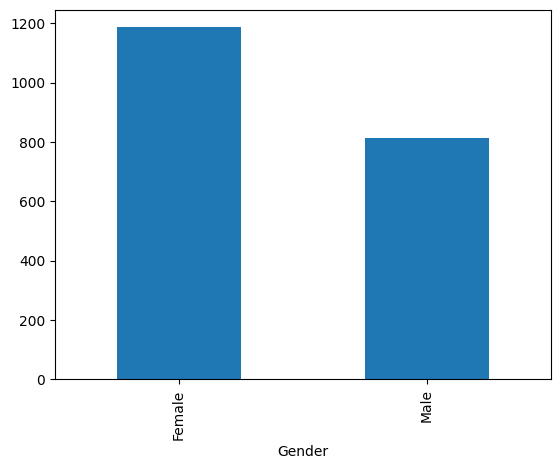

In [116]:
customers_df["Gender"].value_counts().plot(kind='bar')

As we can see, there are more female customers than male customers. Next, let's visualize the distribution of the `Age` column. We would like to see how the `Age` is distributed according to the `Gender`. To do this, run the following code:

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

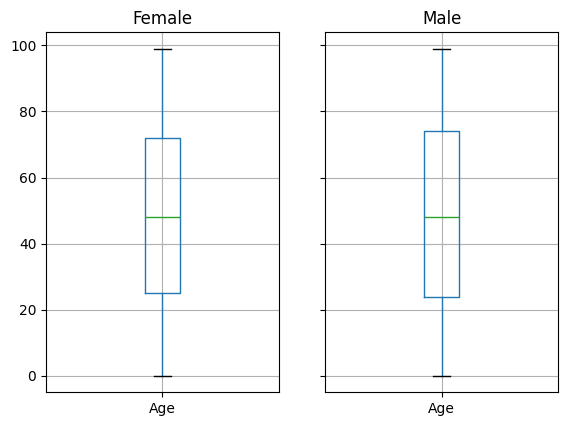

In [117]:
customers_df.groupby(by="Gender").boxplot(column=['Age'])

The boxplot above shows the distribution of the `Age` column according to the `Gender`. We can see that the distribution of age is similar for both genders. The median value for age is also the same. Next, let's visualize the distribution of the `Annual Income` column. We would like to see how the `Annual Income` is distributed according to the `Gender`. To do this, run the following code:

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

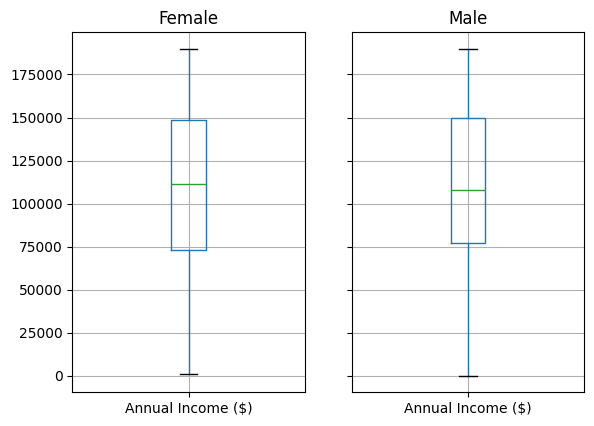

In [118]:
customers_df.groupby(by="Gender").boxplot(column=['Annual Income ($)'])

Again the annual income distribution is similar for both genders, although the median value for annual income is slightly lower for men. Next, we can analyze the distribution of the `Spending Score` column. We would like to see how the `Spending Score` is distributed according to the `Gender`. To do this, run the following code:

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

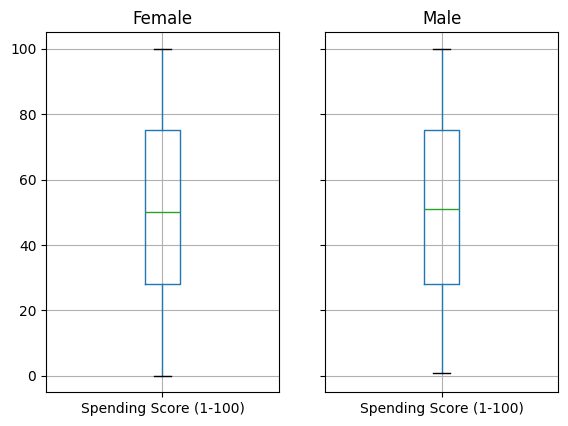

In [119]:
customers_df.groupby(by="Gender").boxplot(column=['Spending Score (1-100)'])

We continue to check the distributions of `Profession` per `Gender`:

<Axes: title={'center': 'Distribution of Profession per Gender'}, xlabel='Profession', ylabel='count'>

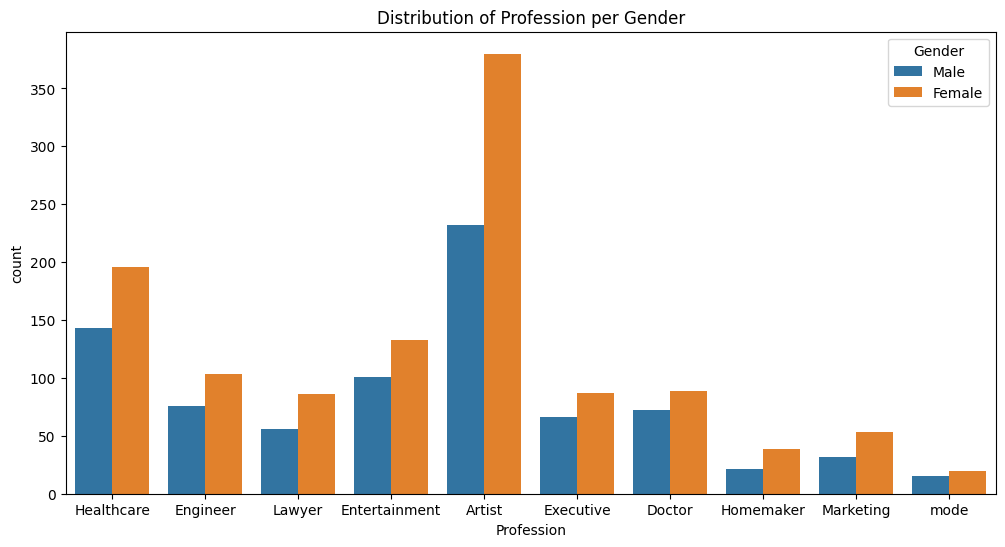

In [120]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Distribution of Profession per Gender')
sns.countplot(data=customers_df, x='Profession', hue='Gender')

And the distributions of `Work Experience` per `Gender`:

<Axes: title={'center': 'Distribution of Work Experience per Gender'}, xlabel='Work Experience', ylabel='count'>

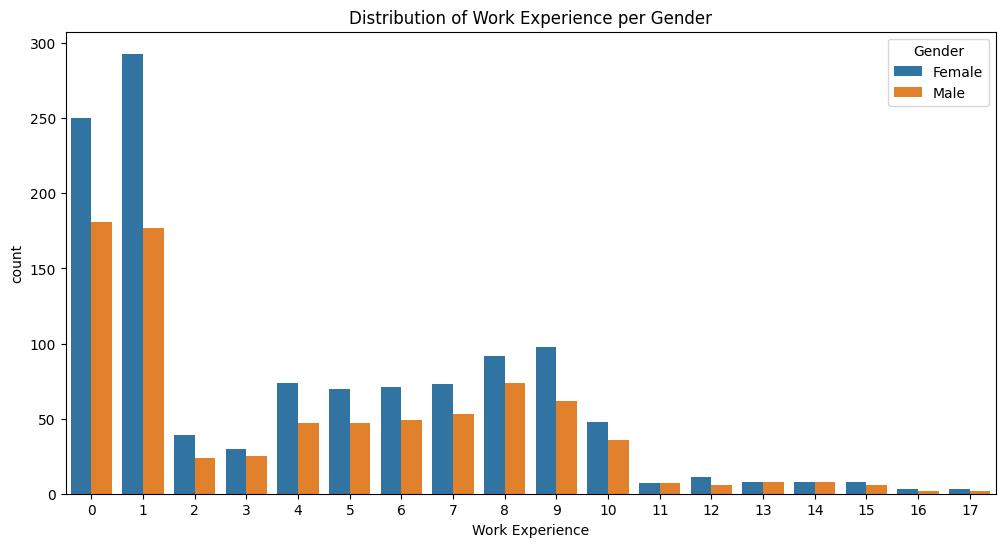

In [121]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Work Experience per Gender')
sns.countplot(data=customers_df, x='Work Experience', hue='Gender')

Last, we check the distributions of `Family Size` per `Gender`:

<Axes: title={'center': 'Distribution of Family Size per Gender'}, xlabel='Family Size', ylabel='count'>

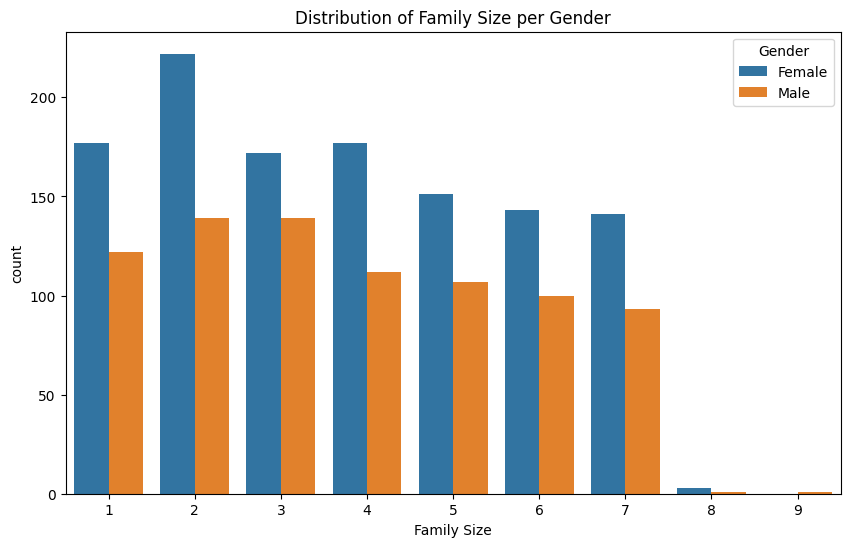

In [122]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Family Size per Gender')
sns.countplot(data=customers_df, x='Family Size', hue='Gender')

From the plots above, we can conclude that while the `Age`, `Income`, and `Spending` do not differ much per `Gender`, the distributions `Profession`, `Work Experience`, and `Family Size` do differ significantly per `Gender`.  

#### Profession

Next, let's visualize the distribution of the `Profession` column. The following code creates a bar plot to visualize the distribution of the `Profession` column:

<Axes: xlabel='Profession'>

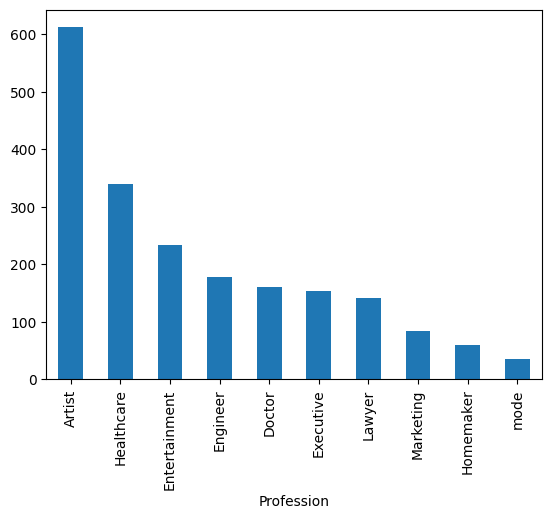

In [123]:
customers_df['Profession'].value_counts().plot(kind='bar')

We see that most customers are artists. Next, we would like to see how the `Age` is distributed according to the `Profession`. To do this, run the following code:

<Axes: title={'center': 'Age'}, xlabel='Profession'>

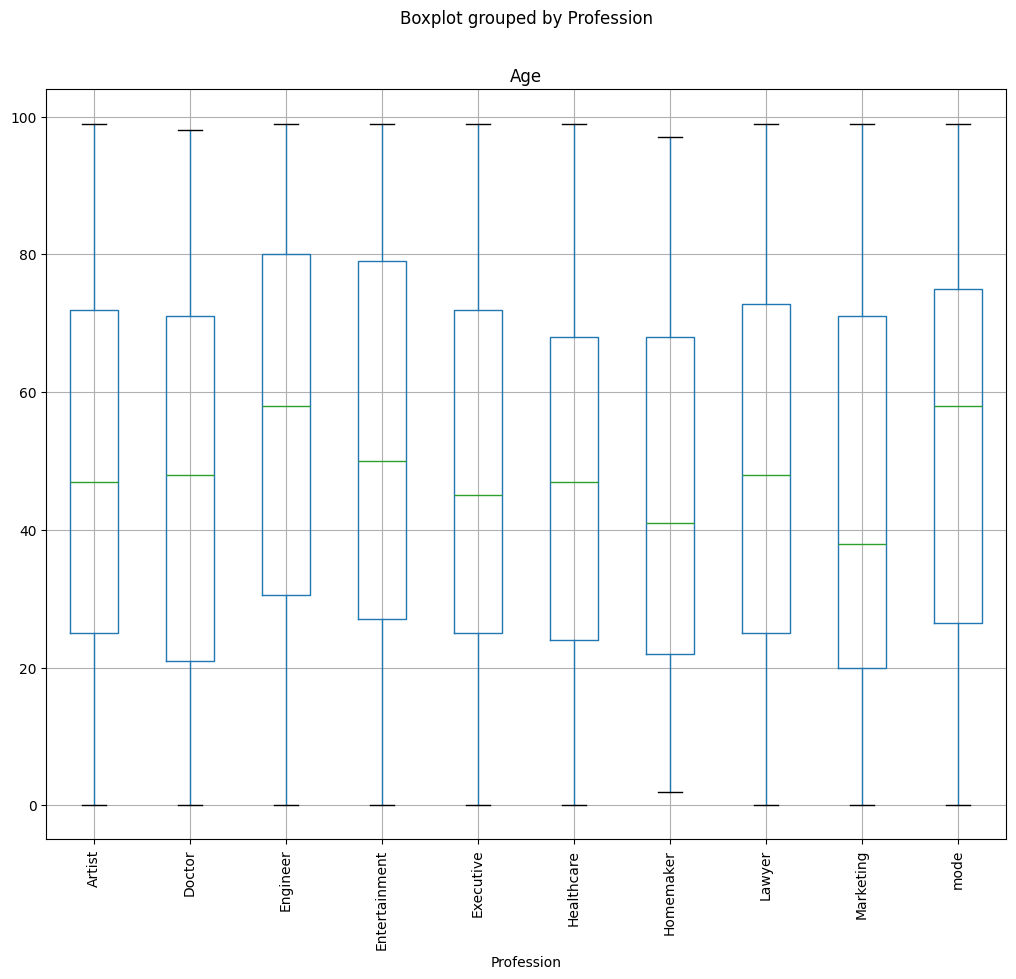

In [124]:
customers_df.boxplot(column=['Age'], by="Profession", figsize=(12,10), rot=90)

We see that the age distributions varies a bit according to the profession. Next, let's visualize the distribution of the `Annual Income` column. We would like to see how the `Annual Income` is distributed according to the `Profession`. To do this, run the following code:

<Axes: title={'center': 'Annual Income ($)'}, xlabel='Profession'>

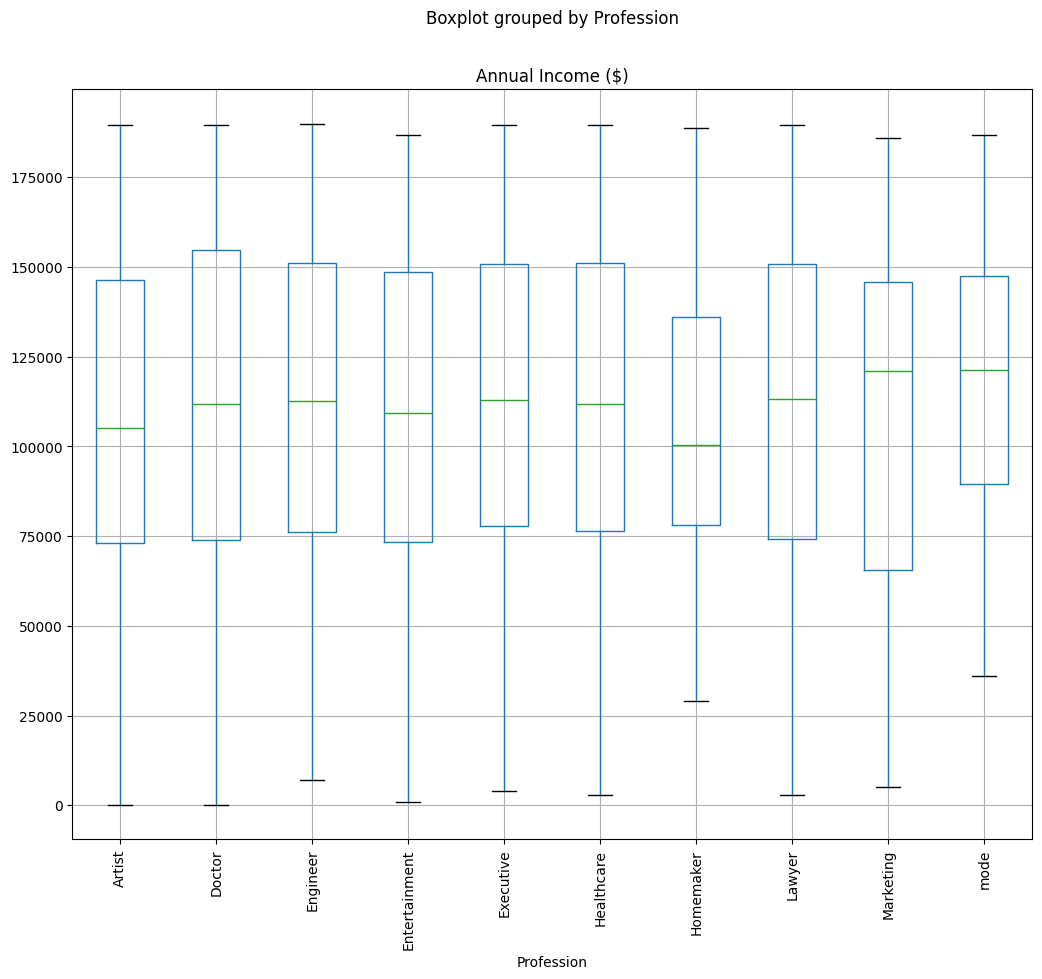

In [125]:
customers_df.boxplot(column=['Annual Income ($)'], by="Profession", figsize=(12,10), rot=90)

Also here we see that the annual income distribution varies according to the profession. Some professions have larger spread in income distribution to others. By adding `Gender` into the equation, we look at how the `Annual Income` is distributed according to the `Profession` and `Gender`. To do this, run the following code:

<Axes: title={'center': 'Annual Income ($)'}, xlabel='[Profession, Gender]'>

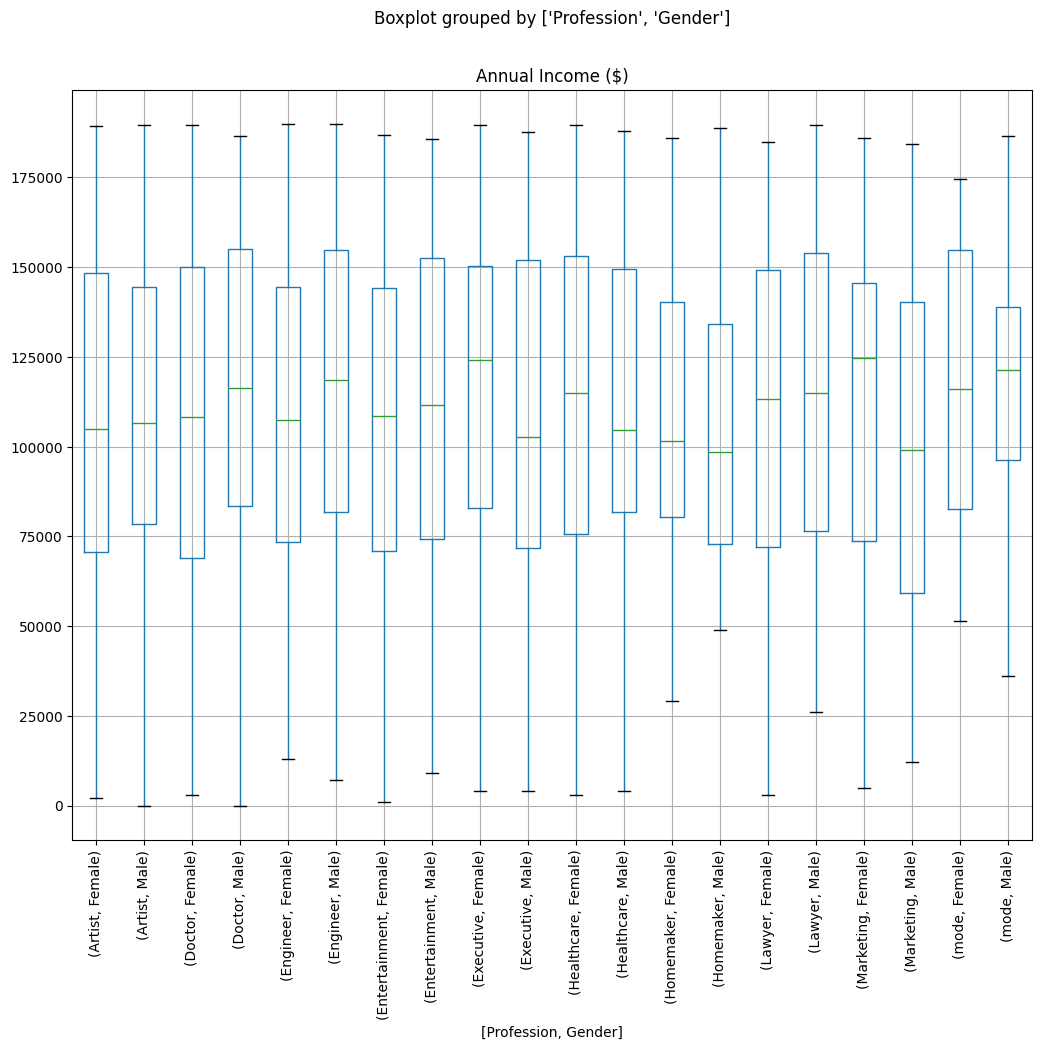

In [126]:
customers_df.boxplot(column=['Annual Income ($)'], by=["Profession", "Gender"], figsize=(12,10), rot=90)

We see that the annual income distribution varies according to the profession and the gender.

Next, we can analyze the distribution of the `Spending Score` column. We would like to see how the `Spending Score` is distributed according to the `Profession`. To do this, run the following code:

<Axes: title={'center': 'Spending Score (1-100)'}, xlabel='Profession'>

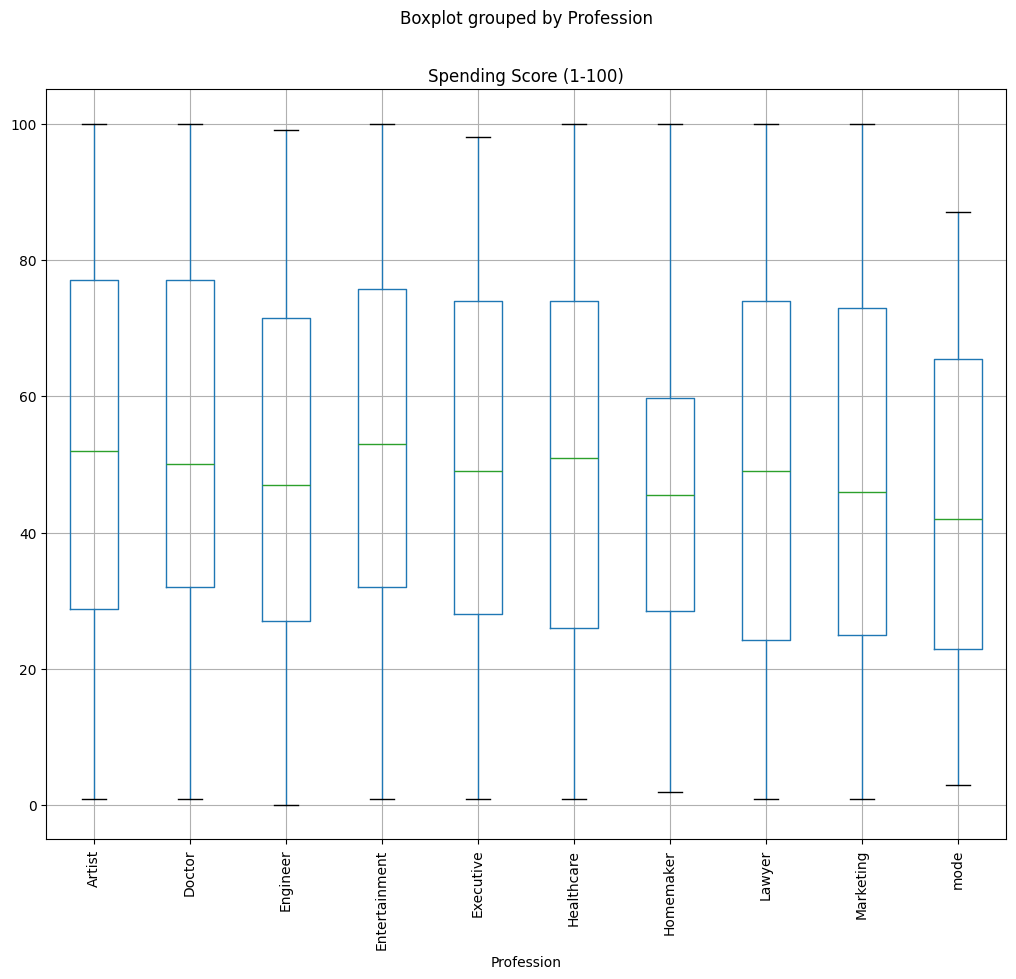

In [127]:
customers_df.boxplot(column=['Spending Score (1-100)'], by="Profession", figsize=(12,10), rot=90)

Also here we can look at the `Spending Score` according to the `Profession` and `Gender`. To do this, run the following code:

<Axes: title={'center': 'Spending Score (1-100)'}, xlabel='[Profession, Gender]'>

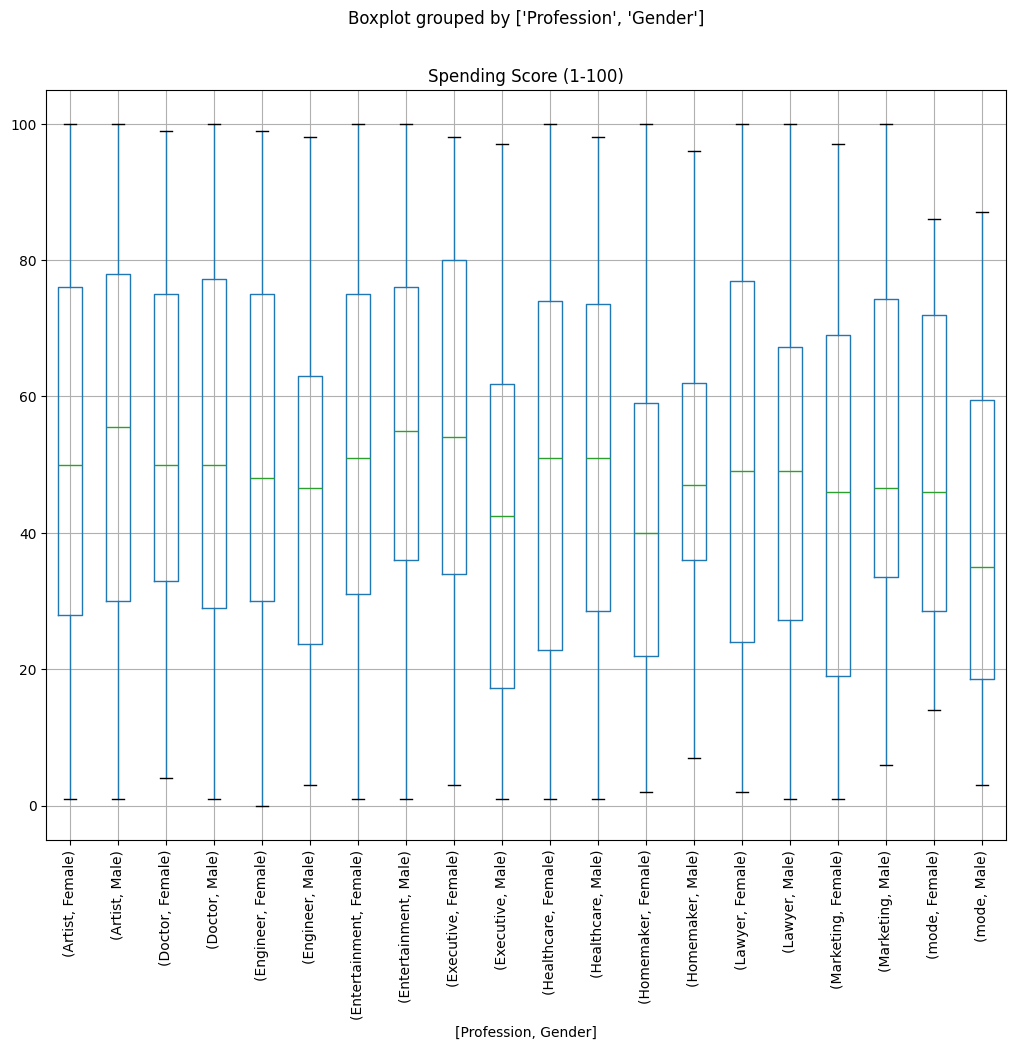

In [128]:
customers_df.boxplot(column=['Spending Score (1-100)'], by=["Profession", "Gender"], figsize=(12,10), rot=90)

## Data Preprocessing

After exploring the data, we can proceed with data preprocessing. In this step, we will encode the categorical columns and scale the numerical columns. We will use label encoding to encode the `Gender` and `Profession` columns. We will use `StandardScaler` to scale the numerical columns. But before we do that, we need to drop the `Customer ID` column, as it is not useful for clustering. To do this, run the following code:

In [129]:
customers_df.drop(columns=['CustomerID'], inplace=True)

First, we will encode the catorical columns. We will use `LabelEncoder` from the `sklearn.preprocessing` module to encode the `Gender` and `Profession` columns. To do this, run the following code:

In [130]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["Gender", "Profession"]

for categorical_column in categorical_columns:
    encoder = LabelEncoder()
    customers_df[categorical_column] = encoder.fit_transform(customers_df[categorical_column])

customers_df.head()

Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0       1   19              15000                      39           5   
1       1   21              35000                      81           2   
2       0   20              86000                       6           2   
3       0   23              59000                      77           7   
4       0   31              38000                      40           3   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6

After that, we will scale the numerical columns. We will use `StandardScaler` from the `sklearn.preprocessing` module to scale the `Age`, `Annual Income`, `Spending Score`, `Work Experience`, and `Family Size` columns. Scaling is important for clustering algorithms, as it ensures that all features contribute equally to the clustering process. To do this, run the following code:

In [131]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]

scaler = StandardScaler()

customers_df[customers_df.columns] = scaler.fit_transform(customers_df)
customers_df.head()

Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0  1.207064 -1.054089          -2.093501               -0.428339    0.778356   
1  1.207064 -0.983723          -1.656133                1.075546   -0.354347   
2 -0.828457 -1.018906          -0.540845               -1.609962   -0.354347   
3 -0.828457 -0.913356          -1.131292                0.932319    1.533491   
4 -0.828457 -0.631891          -1.590528               -0.392532    0.023220   

   Work Experience  Family Size  
0        -0.791207     0.117497  
1        -0.281162    -0.390051  
2        -0.791207    -1.405148  
3        -1.046230    -0.897599  
4        -0.536185     1.132594

## K-Means Clustering



The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

More information about the K-Means algorithm can be found in the `sklearn` documentation for [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


### Advantages
------------------------------------------------------------
- Easy to understand
- Scalable to large datasets
- Many different applications!

### Disadvantages
------------------------------------------------------------
- How to set $k$?
- Unable to discover certain types of clusters (elongated, encompassing...)

### The parameters include
------------------------------------------------------------
- $k$: the number of cluster centers

## Evaluation of cluster quality

Just as we have seen in supervised learning, we would like to evaluate the quality of the patterns the unsupervised learning model identified. However, as we do not have labels in unsupervised learning, we cannot use metrics such as accuracy, precision, recall, or F1 score. The quality metrics are different for each type of unsupervised learning method. Evaluating the quality of clustering is less straightforward than evaluating the quality of supervised learning models. There are many different metrics available to evaluate the quality of clustering, and the choice of metric depends on the specific problem and the desired outcome. Most clustering metrics are based on the distance between data points and the cluster centers; these metrics measure how well the clusters are separated and how compact the clusters are. 

Here we will look at the quality metrics for clustering. We will look at three different cluster metrics:

- The inertia of the clusters (within-cluster sum-of-squares)
- The silhouette score
- The Calinski-Harabasz score

Just as with supervised learning, there are many more possible metrics. For a full list of metrics, see the `sklearn` documentation for [Clustering Performance Evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation).

### The Elbow Method

The elbow method is a technique used to determine the optimal number of clusters in a dataset. It helps determine the $k$ parameter in K-means. The elbow method helps with this by plotting the sum of squared distances from each point to its assigned cluster center (called the "inertia") for different numbers of clusters. 

Here's how it works:
1. Start with one cluster and calculate the inertia.
2. Increase the number of clusters and calculate the inertia again.
3. Repeat this process for a range of cluster numbers.

When you plot these values, you'll get a graph that looks like an arm. The point where the "elbow" appears (where the graph bends) is considered the optimal number of clusters. This is because adding more clusters beyond this point doesn't significantly reduce the inertia, meaning the clusters are already well-defined.

In summary, the elbow method helps you find the right balance between having too few and too many clusters by looking for the "elbow" point on the graph. The code below shows how to use the elbow method to determine the optimal number of clusters for the dataset.

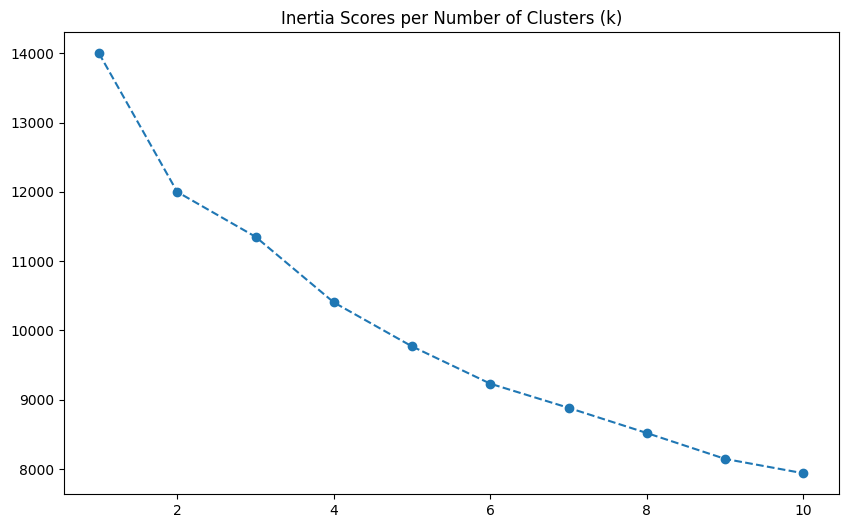

In [132]:
from sklearn.cluster import KMeans


def evaluate_kmeans(data: pd.DataFrame, 
                    min_clusters: int = 1,
                    max_clusters: int = 10, 
                    evaluation_function = lambda data, kmeans: kmeans.inertia_):
    scores = []

    for k in range(min_clusters, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = evaluation_function(data, kmeans)
        scores.append(score)
    return scores 

inertia_scores = evaluate_kmeans(customers_df)
plt.figure(figsize=(10, 6))
plt.title('Inertia Scores per Number of Clusters (k)')
plt.plot(range(1, len(inertia_scores)+1), inertia_scores, marker='o', linestyle='--')

In the plot above, we see that the graph bends at $k=2$, which indicates that $k=2$ is the optimal number of clusters for this dataset according to the Elbow method. 

### The Silhouette Method

The silhouette method is a technique used to determine the quality of clusters in a clustering algorithm. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette value ranges from -1 to 1, where:

- A value close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- A value close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- A value close to -1 indicates that the object might have been assigned to the wrong cluster.

The silhouette value for a sample ( $i$ ) is calculated as follows:

1. Calculate the average distance between ( $i$ ) and all other samples in the same cluster. This is known as the mean intra-cluster distance ( $a(i)$ ).
2. Calculate the average distance between ( $i$ ) and all samples in the nearest cluster that ( $i$ ) is not a part of. This is known as the mean nearest-cluster distance ( $b(i)$ ).
3. The silhouette value ( $s(i)$ ) is then given by: $ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $
4. The overall silhouette score for a clustering solution is the average silhouette value of all samples.

For more information see the sklearn documentation for [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Below we plot the average silhouette score for different numbers of clusters $k$.


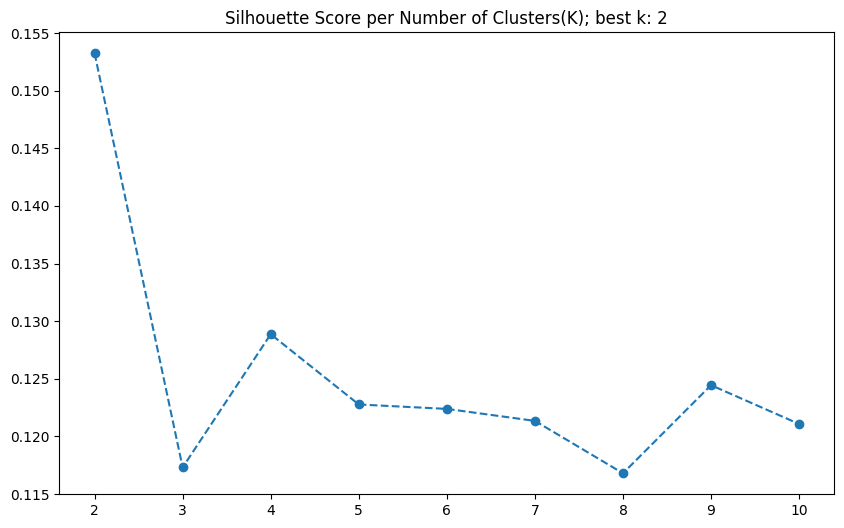

In [133]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = evaluate_kmeans(customers_df, min_clusters=2, evaluation_function=lambda data, kmeans: silhouette_score(data, kmeans.labels_))

best_k = np.argmax(silhouette_scores) + 2
plt.figure(figsize=(10, 6))
plt.title(f'Silhouette Score per Number of Clusters(K); best k: {best_k}')
plt.plot(range(2, len(silhouette_scores)+2), silhouette_scores, marker='o', linestyle='--')

The silhouette scores above are average scores over all clusters. The best score per cluster is 1. The closer the average value of the silhouette score is to 1, the better the clusters. I.e. the higher the silhouette score, the better. In the plot above, the highest silhouette score is achieved when $k=2$, which indicates that $k=2$ is the optimal number of clusters for this dataset according to the silhouette method. This confirms the result we obtained using the elbow method.

### Calinski-Harabasz Index

The Calinski-Harabasz index, also known as the Variance Ratio Criterion, is defined as the ratio of the sum of between-cluster dispersion and within-cluster dispersion for all clusters.

Here's a step-by-step explanation:

1. Between-cluster dispersion ($B(k)$): This measures how far the cluster centroids are from the overall centroid of the data. It is calculated as the sum of squared distances between each cluster centroid and the overall centroid, weighted by the number of points in each cluster.

2. Within-cluster dispersion ($W(k)$): This measures how compact the clusters are. It is calculated as the sum of squared distances between each point and the centroid of its cluster.

3. Calinski-Harabasz Index ($CH(k)$): The index is calculated using the formula: $ CH(k) = \frac{B / (k - 1)}{W / (n - k)} $ where:
   - ( $B(k)$ ) is the between-cluster dispersion.
   - ( $W(k)$ ) is the within-cluster dispersion.
   - ( $k$ ) is the number of clusters.
   - ( $n$ ) is the total number of data points.

A higher Calinski-Harabasz index indicates better-defined clusters. This means that the clusters are well-separated and compact, which is desirable in clustering. We can use the Calinski-Harabasz index together with the Elbow and Silhouette methods to determine the optimal number of clusters for a dataset. For more information see the sklearn documentation for [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html).

The code below shows how to calculate the Calinski-Harabasz index for different numbers of clusters and plot the results.

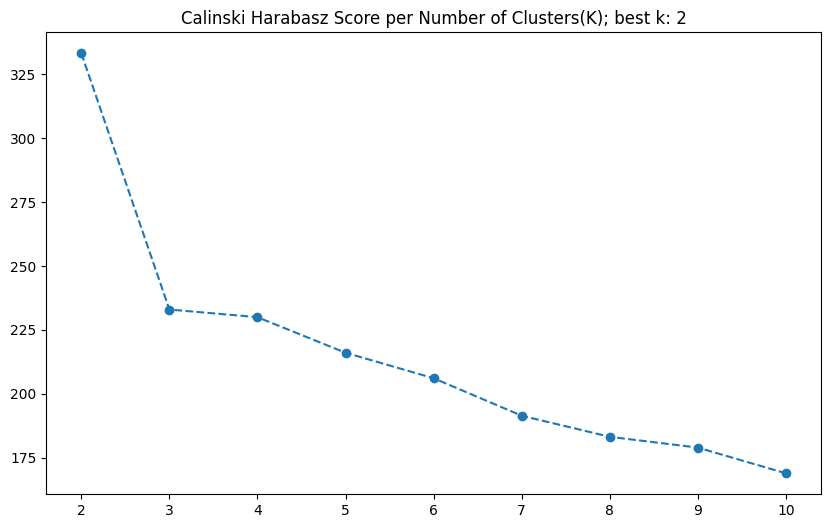

In [134]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_scores = evaluate_kmeans(customers_df, min_clusters=2, evaluation_function=lambda data, kmeans: calinski_harabasz_score(data, kmeans.labels_))

best_k = np.argmax(calinski_harabasz_scores) + 2
plt.figure(figsize=(10, 6))
plt.title(f'Calinski Harabasz Score per Number of Clusters(K); best k: {best_k}')
plt.plot(range(2, len(calinski_harabasz_scores)+2), calinski_harabasz_scores, marker='o', linestyle='--')

Again we see that the highest Calinski-Harabasz index is achieved when $k=2$, which confirms the results we obtained with the other methods. It looks that $k=2$ is the optimal number of clusters for this dataset. 

## K-Means Clustering with $k=2$

Now that we have determined that $k=2$ is the optimal number of clusters for this dataset, we can carry out the K-Means clustering algorithm with $k=2$ and assign a cluster label to each datapoint in the dataset. To do this, run the following code:

In [135]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(customers_df)

customers_df['Cluster'] = kmeans.labels_
customers_df.head()

Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0  1.207064 -1.054089          -2.093501               -0.428339    0.778356   
1  1.207064 -0.983723          -1.656133                1.075546   -0.354347   
2 -0.828457 -1.018906          -0.540845               -1.609962   -0.354347   
3 -0.828457 -0.913356          -1.131292                0.932319    1.533491   
4 -0.828457 -0.631891          -1.590528               -0.392532    0.023220   

   Work Experience  Family Size  Cluster  
0        -0.791207     0.117497        0  
1        -0.281162    -0.390051        0  
2        -0.791207    -1.405148        1  
3        -1.046230    -0.897599        1  
4        -0.536185     1.132594        1

In addition, we can retrieve the cluster center for each of the clusters, in this case there are two cluster centers:

In [136]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.20706357e+00,  7.02627088e-03,  5.67488248e-03,
        -6.36735946e-04,  1.06966708e-02,  2.49273473e-02,
         2.74973967e-04],
       [-8.28456783e-01, -4.82241526e-03, -3.89490248e-03,
         4.37017757e-04, -7.34155989e-03, -1.71086516e-02,
        -1.88725809e-04]])

These cluster centroids are in a normalized form, as we scaled the data before clustering. We can use the `scaler.inverse_transform` method to transform the cluster centroids back to the original scale. In this way, we can interpret the cluster centroids in terms of the original features. To do this, run the following code:

In [137]:
cluster_values = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=customers_df.columns[:-1].values)
cluster_values


Gender        Age  Annual Income ($)  Spending Score (1-100)  \
0  1.000000e+00  49.159705      110991.323096               50.944717   
1  1.554312e-15  48.822934      110553.715008               50.974705   

   Profession  Work Experience  Family Size  
0    2.966830         4.200246     3.769042  
1    2.919056         4.035413     3.768128

We can see that for the numerical values, the cluster centers make sense. For example, the first cluster has a higher average age, a higher annual income, and a lower spending score compared to the second cluster. The cluster values make less sense for the categorical values as a gender value with digits or family size of 3.7 is not possible. The same holds true for the profession and the work experience.

It can be seen that both clusters centers are points in a 7-dimensional space. This happens because the dataset has 7 features. As it's not possible to visualize a 7-dimensional space, we need to use a dimensionality reduction technique to visualize the clusters. We will address the details of these methods in a later notebook. For now, we use one common technique called Principal Component Analysis (PCA). 

<Axes: >

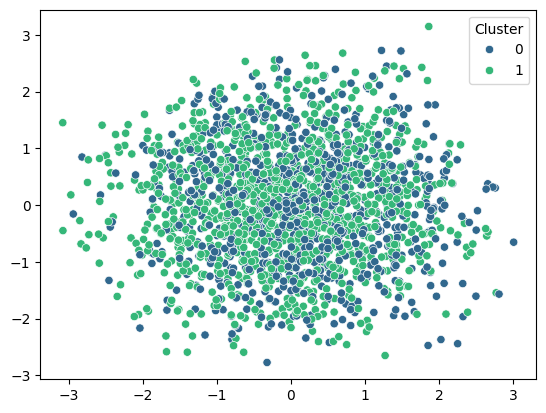

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customers_pca = pca.fit_transform(customers_df[customers_df.columns[:-1]])

sns.scatterplot(x=customers_pca[:, 0], y=customers_pca[:, 1], hue=customers_df['Cluster'], palette='viridis')

It can be seen that the clusters are not really separated in the 2-dimensional space. The K-Means algorithm did not successfully identify distinct clusters in the dataset.

# Conclusion

In this notebook, we explored unsupervised learning, focusing on clustering. We used the K-Means clustering algorithm to identify patterns in the dataset and assign cluster labels to each data point. We evaluated the quality of the clusters using: 
- the inertia, 
- silhouette score, 
- and Calinski-Harabasz index. 

We used these quality metrics to determine the optimal number of clusters $k$ for the dataset. We then carried out the K-Means clustering algorithm with the optimal number of clusters ($k=2$) and visualized the clusters in a 2-dimensional space using PCA. The K-Means algorithm however did not successfully identify distinct clusters in the dataset. In the next notebook, we will explore the DBSCAN clustering algorithm, which is more suitable for datasets with complex cluster shapes and varying cluster densities.